<h1> Tensorflow BERT</h1>
-  Pre-Trained Model

In [8]:
# // Content Coming

In [64]:
# Imports.
import tensorflow as tf
import pandas     as pd
import seaborn    as sn

import matplotlib.pyplot as plt
import tensorflow_hub    as hub
import tensorflow_text

from sklearn.model_selection  import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Text Vorverarbeitung.
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
# Model URL.
# - 12-Layer Encoder, Hidden State 786, Attention 12.
model_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_h-768_a-12/4"

In [7]:
preprocess_model = hub.KerasLayer(preprocess_url)
bert_model       = hub.KerasLayer(model_url)

Bei der Vorverarbeitung wird der Text zerlegt und auf den Input des Models vorbereitet. 

In [9]:
my_text = ['I love the weather', 'It is cold outside']

In [10]:
text_pre = preprocess_model(my_text)
text_pre.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

In [12]:
# Maske: 128 Felder. len(Wörter) + CLS und SEP als Start und Stopp Markierung.
text_pre['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [13]:
# CLS und SEP haben eindeutige ID.
text_pre['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[ 101, 1045, 2293, 1996, 4633,  102,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 101, 2009, 2003, 3147, 2648,  102,    0,    0,    0,    0,    0,
           0,

In [15]:
res = bert_model(text_pre)
res.keys()

dict_keys(['pooled_output', 'encoder_outputs', 'sequence_output', 'default'])

Da Bert auch Sätze in Embeddings umwandelt, können wir uns diese auch anschauen.

In [16]:
res['pooled_output']  
# Siehe shape
# - 2 Sätze, pro Satz ist das Embedding 768 groß (Feature Vektor).

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8012028 , -0.21276477,  0.547637  , ...,  0.41817757,
        -0.5785713 ,  0.886891  ],
       [-0.957944  , -0.49577132, -0.8639059 , ..., -0.5520457 ,
        -0.79228157,  0.9746018 ]], dtype=float32)>

In [17]:
res['sequence_output']  
# 2 Sätze, 128 Felder, und 768 Embedding Größe.
# - Padding ist mit einbezogen => mit Nullen aufgefüllt, Nullen haben auch eine Bedeutung in einem Kontext.
# - Felder sind mit Nullen gefüllt. 

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.16640215,  0.21280019, -0.01412425, ..., -0.1850934 ,
          0.07010515,  0.11852711],
        [ 0.26884323,  0.13130087, -0.37201694, ..., -0.25093246,
          0.54059756,  0.2779943 ],
        [ 1.0516487 ,  0.6443754 ,  0.6208947 , ...,  0.11166093,
          0.37581402,  0.05108429],
        ...,
        [ 0.12579383,  0.07240888,  0.4809288 , ...,  0.14834568,
         -0.18970679,  0.07317624],
        [ 0.10029982,  0.06254511,  0.46967486, ...,  0.13002957,
         -0.18936923,  0.0518095 ],
        [ 0.02447775, -0.03255071,  0.53693694, ...,  0.19646813,
         -0.19026789,  0.03251599]],

       [[-0.00475215,  0.28270403, -0.03937021, ..., -0.39060676,
          0.2287043 ,  0.46302563],
        [-0.44847554, -0.53774446, -0.23297879, ...,  0.23324648,
          0.69759136,  0.9842446 ],
        [ 0.08584108, -0.2737781 ,  0.08099579, ..., -0.10644558,
         -0.12342825,  0.50278175],
        ...,

In [19]:
len(res['encoder_outputs'])
# 12 Layer Encoder, Output der Embeddings der 12 Layer. Jeder hat eine 768 Vektorgröße. 

12

In [21]:
res['encoder_outputs'][-1]
# Die letzte Schicht ist dieselbe wie sequence_output.

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.16640215,  0.21280019, -0.01412425, ..., -0.1850934 ,
          0.07010515,  0.11852711],
        [ 0.26884323,  0.13130087, -0.37201694, ..., -0.25093246,
          0.54059756,  0.2779943 ],
        [ 1.0516487 ,  0.6443754 ,  0.6208947 , ...,  0.11166093,
          0.37581402,  0.05108429],
        ...,
        [ 0.12579383,  0.07240888,  0.4809288 , ...,  0.14834568,
         -0.18970679,  0.07317624],
        [ 0.10029982,  0.06254511,  0.46967486, ...,  0.13002957,
         -0.18936923,  0.0518095 ],
        [ 0.02447775, -0.03255071,  0.53693694, ...,  0.19646813,
         -0.19026789,  0.03251599]],

       [[-0.00475215,  0.28270403, -0.03937021, ..., -0.39060676,
          0.2287043 ,  0.46302563],
        [-0.44847554, -0.53774446, -0.23297879, ...,  0.23324648,
          0.69759136,  0.9842446 ],
        [ 0.08584108, -0.2737781 ,  0.08099579, ..., -0.10644558,
         -0.12342825,  0.50278175],
        ...,

Mit Bert können wir also Embeddings für Sätze und Wörter erstellen, aber wie könnte uns das z. B. bei der Klassifizierung von Texten helfen, z. B. von Spam Emails?

Der Output ist ein Vektor, der an ein ANN angeschlossen werden kann. Diese Zahlen, die Features eines Satzes oder Worts repräsentieren, werden einem neuralen Netz übergeben, das diese Werte lernen soll.
- Vergleichbar mit einem CNN, was ein Faltungsnetz nutzt, um die Features der Bilder zu erkennen.

Für den Einsatz können wir dieses Dataset nutzen.

Dataset: <br>
https://www.kaggle.com/datasets/mohinurabdurahimova/maildataset [Letzter Zugriff 19.06.2024]
https://www.cs.cmu.edu/~./enron/ [Letzter Zugriff 19.06.2024] <br>
> William W. Cohen, MLD, CMU  <br>Last modified: Fri May 8 09:52:31 EDT 2015
5

In [23]:
mail_df = pd.read_csv('./data/datasets/mail_data.csv')
mail_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
mail_df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

Bei dieser Kategorie von Datasets sind die Klassen meist nicht gut ausbalanciert. 

Es gibt verschiedene Techniken, das Problem anzugehen. 

In [29]:
# Undersampling #
spam_df = mail_df[mail_df['Category']=='spam']  # Wähle Spam aus.
ham_df  = mail_df[mail_df['Category']=='ham'].sample(747)  # Ziehe Spalten. 

mail_df2 = pd.concat([spam_df, ham_df], axis=0)
mail_df2.head()

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [31]:
mail_df2['Category'].value_counts()

Category
spam    747
ham     747
Name: count, dtype: int64

In [33]:
mail_df2['spam'] = pd.get_dummies(mail_df2['Category'], drop_first=True, dtype='int')
mail_df2.head()

,Category,Message,spam
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1


In [34]:
mail_df2.sample(5)

,Category,Message,spam
4859,ham,Ok...,0
2591,ham,Lol I have to take it. member how I said my au...,0
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
2247,spam,Hi ya babe x u 4goten bout me?' scammers getti...,1
2620,spam,<Forwarded from 21870000>Hi - this is your Mai...,1


In [37]:
# Erstelle Train- und Testset
X_train, X_test, y_train, y_test = train_test_split(mail_df2['Message'],\
                                                    mail_df2['spam'], test_size=0.2, stratify=mail_df2['spam'])

Jetzt haben wir die Texte und können diese dem BERT Model übergeben.

BERT kann ganze Sätze in eine allgemeine Repräsentation in Zahlen umwandeln, ein Vektor (Embedding) der Größe 768.

In [44]:
# Direkt alles. 
X_text_encode = preprocess_model(X_train)
X_train_vec   = bert_model(X_text_encode)  

In [45]:
X_train_vec 

{'pooled_output': <tf.Tensor: shape=(1195, 768), dtype=float32, numpy=
 array([[-0.7459851 , -0.39389586, -0.8901701 , ..., -0.67245144,
         -0.6430073 ,  0.746314  ],
        [-0.83781606, -0.5665021 , -0.94532657, ..., -0.7182184 ,
         -0.6876945 ,  0.9231665 ],
        [-0.8792912 , -0.52810925, -0.89278185, ..., -0.79390144,
         -0.7245473 ,  0.8634559 ],
        ...,
        [-0.83053875, -0.3336296 , -0.70428   , ..., -0.5367614 ,
         -0.6270934 ,  0.82644075],
        [-0.8563774 , -0.5403777 , -0.937547  , ..., -0.80832946,
         -0.733253  ,  0.8219087 ],
        [-0.665573  , -0.5059134 , -0.5759587 , ..., -0.3828985 ,
         -0.6660171 ,  0.7703174 ]], dtype=float32)>,
 'encoder_outputs': [<tf.Tensor: shape=(1195, 128, 768), dtype=float32, numpy=
  array([[[-2.03809589e-02,  8.90215635e-02, -1.93877727e-01, ...,
            1.78918228e-01, -4.60584313e-02, -6.41260073e-02],
          [ 5.09440973e-02,  4.31228817e-01,  5.45387268e-02, ...,
          

In [46]:
# Oder als Funktion.
def get_embedding(text:[str]):
    text_pre   = preprocess_model(text)
    return bert_model(text_pre)['pooled_output']

Mit einer Metrik können wir die Ähnlichkeit von Vektoren feststellen. 

In [55]:
emb = get_embedding([
    'cars are fast',
    'trucks are great',
    'sunny outside',
    'cloudy and stormy'])
emb

<tf.Tensor: shape=(4, 768), dtype=float32, numpy=
array([[-0.76106334, -0.20316286,  0.5563706 , ...,  0.35316694,
        -0.55543196,  0.8357486 ],
       [-0.81265604, -0.2826185 , -0.07989254, ...,  0.04594581,
        -0.6024226 ,  0.89762324],
       [-0.94490236, -0.3988505 , -0.74672586, ..., -0.6844511 ,
        -0.7065097 ,  0.9473018 ],
       [-0.9682528 , -0.6924797 , -0.9970205 , ..., -0.97805023,
        -0.84167826,  0.9543225 ]], dtype=float32)>

In [52]:
cosine_similarity([emb[0]], [emb[1]])

array([[0.7970574]], dtype=float32)

Der Score sagt aus, wie ähnlich sich diese Vektoren sind.
- Erstellte Embeddings sind vom Kontext und den Daten abhängig, mit dem das Model trainiert wurde.
- Basierend auf den Trainingsdaten wurde dementsprechend auch die Weights angepasst, was auch die Embeddings sind.

In [58]:
input_text = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
text_prepr = preprocess_model(input_text) 
outputs = bert_model(text_prepr)


layers = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
layers = tf.keras.layers.Dense(units=1, activation="sigmoid", name="out")(layers)

model = tf.keras.Model(inputs=[input_text], outputs=[layers])

In [59]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [61]:
# Bei Funktional:
# - Input kann vorher definiert werden. 
Metrics = [
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="percision")

]
model.compile(
    optimizer='adam',
    loss     ='binary_crossentropy' ,
    metrics  = Metrics
)

In [62]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
38/38 [==============================] - 103s 3s/step - loss: 0.6259 - accuracy: 0.6619 - percision: 0.6726
Epoch 2/3
38/38 [==============================] - 94s 2s/step - loss: 0.5010 - accuracy: 0.8285 - percision: 0.7946
Epoch 3/3
38/38 [==============================] - 93s 2s/step - loss: 0.4372 - accuracy: 0.8628 - percision: 0.8653


In [65]:
y_pred = model.predict(X_test)

10/10 [==============================] - 23s 2s/step


AttributeError: 'numpy.ndarray' object has no attribute 'flattern'

In [67]:
y_pred = y_pred.flatten()

Da wir die Sigmoid-Funktion für die Aktivierung benutzt haben, befinden sich die Werte in einer 0 bis 1 Skala. Ein Wert über 0,5 bedeutet True, also es trifft zu.

In [70]:
y_pred2 = [0 if x<=0.5 else 1   for x in y_pred ] 
y_pred2

[1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,


Text(50.722222222222214, 0.5, 'Truth')

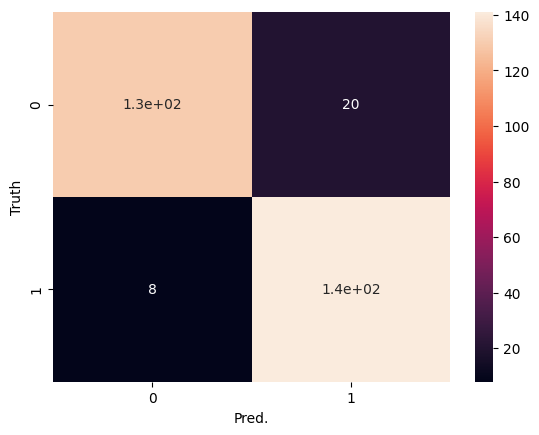

In [71]:
cm = confusion_matrix(y_test, y_pred2)
sn.heatmap(cm, annot=True)
plt.xlabel('Pred.')
plt.ylabel('Truth')

In [72]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       150
           1       0.88      0.95      0.91       149

    accuracy                           0.91       299
   macro avg       0.91      0.91      0.91       299
weighted avg       0.91      0.91      0.91       299

